# Medical Cost Prediction

Proyek ini bertujuan untuk memprediksi biaya medis yang dikeluarkan berdasarkan informasi pasien. Dataset yang digunakan adalah data insuransi dari [Kaggle](https://www.kaggle.com/mirichoi0218/insurance). Dataset ini berisi 


| Fitur | Deskripsi |
| --- | --- |
| age | usia penerima asuransi |
| bmi | indeks massa tubuh |
| children | jumlah anak yang ditanggung asuransi |
| smoker | merokok |
| region | daerah tempat tinggal penerima manfaat di US |
| charges | biaya medis yang ditanggung asuransi |

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Tidak ada missing values.

In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Berdasarkan dataset asuransi, didapatkan informasi sebagai berikut:
- Pasien termuda berumur 18 tahun dan tertua adalah 64 tahun, dengan rata-rata berumur 39 tahun.
- BMI terendah adalah 15 dan tertinggi 53.
- Biaya medis terendah adalah 1.122 dan tertinggi adalah 63.770, dengan rata-rata 13.270

# Exploratory Data Analysis

Untuk memahami data yang ada bisa dilakukan Visualisasi data. Pada bagian ini saya akan memetakan distribusi setiap variabel untuk mendapatkan gambaran umum jumlah dan distribusinya.

Text(0, 0.5, 'Count')

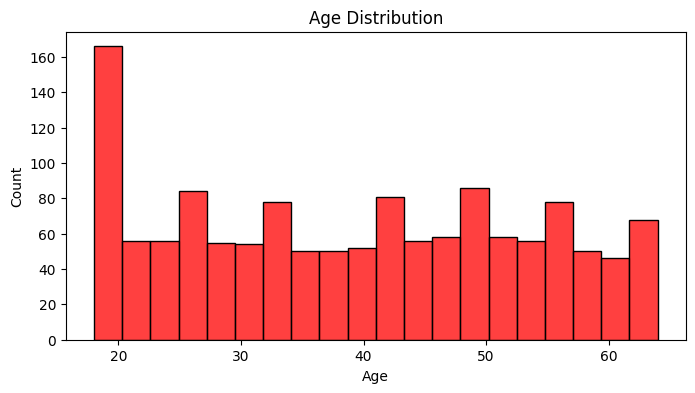

In [5]:
# Age distribution
plt.figure(figsize=(8,4))
sns.histplot(x=df.age, bins=20, kde=False, color='red')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

Text(0.5, 1.0, 'Gender Distribution')

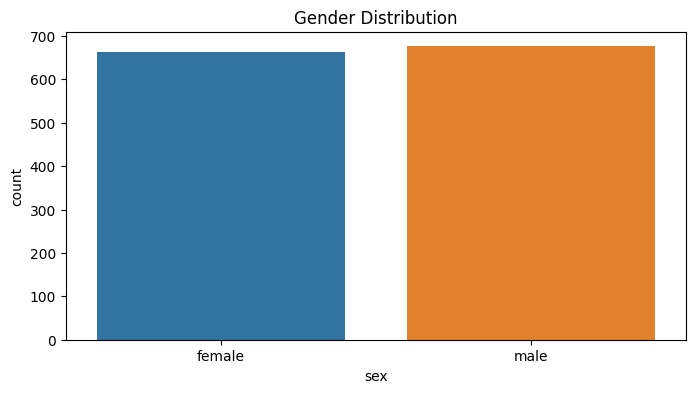

In [6]:
# Gender plot
plt.figure(figsize=(8,4))
sns.countplot(x=df.sex, hue=df.sex)
plt.title('Gender Distribution')

Dapat dilihat dengan jelas bahwa perempuan dan laki-laki memiliki jumlah yang hampir sama di dataset.

Text(0, 0.5, 'Count')

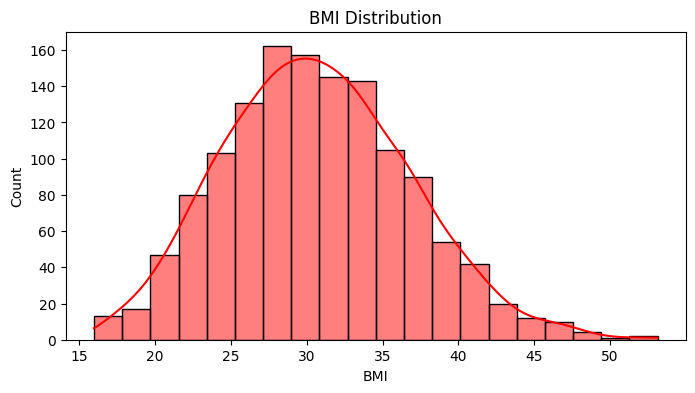

In [7]:
# BMI distribution
plt.figure(figsize=(8,4))
sns.histplot(x=df.bmi, bins=20, kde=True, color='red')
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Count')

Mayoritas pasien memiliki BMI diantara 25 dan 35 yang dianggap sebagai kelebihan berat badan yang dapat meningkatkan risiko kesehatan dan menyebabkan kenaikan biaya pengobatan.

Text(0, 0.5, 'Count')

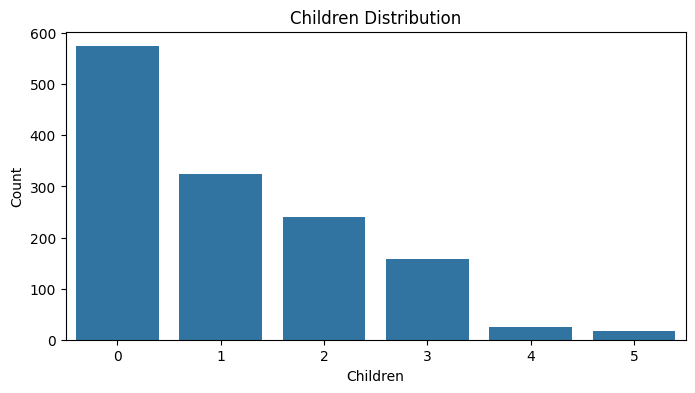

In [8]:
# Children Distribution
plt.figure(figsize=(8,4))
sns.countplot(x=df.children)
plt.title('Children Distribution')
plt.xlabel('Children')
plt.ylabel('Count')

Grafik menunjukan bahwa sebagian besar pasien tidak memiliki anak dan sangat sedikit pasien yang memiliki anak lebih dari 3.

Text(0, 0.5, 'Count')

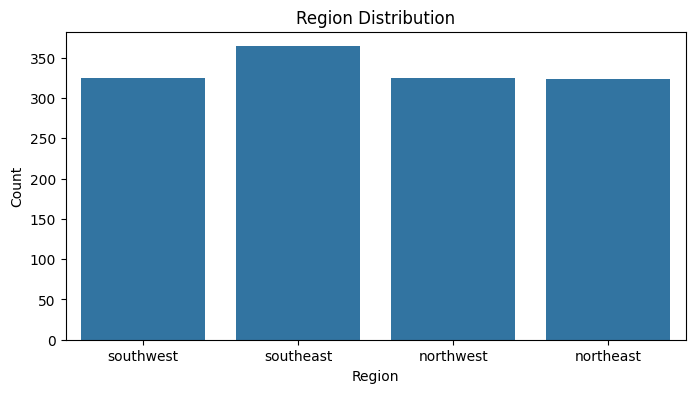

In [9]:
# Region distribution
plt.figure(figsize=(8,4))
sns.countplot(x=df.region)
plt.title('Region Distribution')
plt.xlabel('Region')
plt.ylabel('Count')

Jumlah pasien dari southeast sedikit lebih tinggi daripada wilayah lain yang memiliki jumlah hampir sama.

Text(0, 0.5, 'Count')

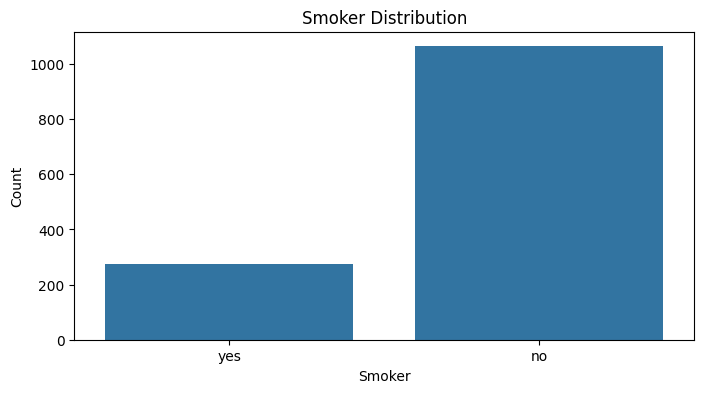

In [10]:
# Count of smoker
plt.figure(figsize=(8,4))
sns.countplot(x=df.smoker)
plt.title('Smoker Distribution')
plt.xlabel('Smoker')
plt.ylabel('Count')

Pasien yang merokok jumlah lebih sedikit dibandingan dengan pasien yang tidak merokok. Sekarang saya akan memetakan pasien merokok atau tidak dengan jumlah anak yang ditanggung.

<Axes: xlabel='children', ylabel='count'>

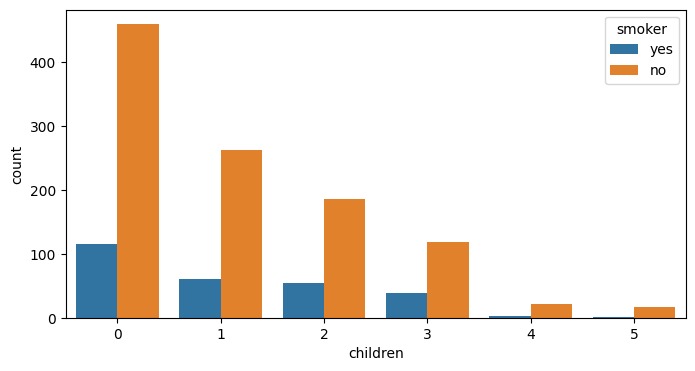

In [11]:
plt.figure(figsize=(8,4))
sns.countplot(x=df.children, hue=df.smoker)

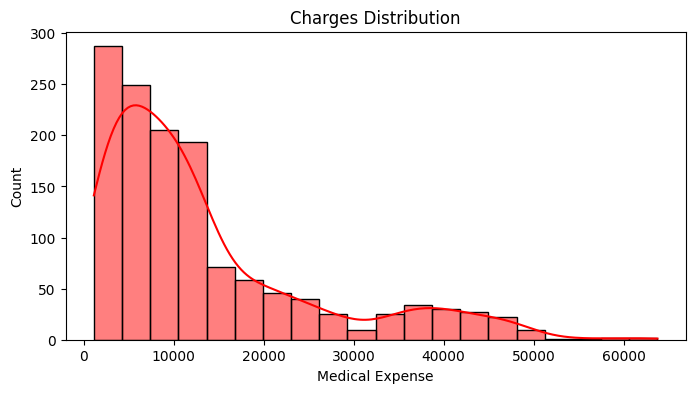

In [12]:
# Charges distribution
plt.figure(figsize=(8,4))
sns.histplot(df.charges, bins=20, kde=True, color='red')
plt.title('Charges Distribution')
plt.xlabel('Medical Expense')
plt.ylabel('Count')
plt.show()

Sebagian besar biaya medis jumlahnya dibawah 20000 dan hanya sedikit pasien yang biaya pengobatannya di atas 50000.

# Data Cleaning

In [13]:
df['sex']= df['sex'].map({'male':1, 'female':0})
df['smoker'] = df['smoker'].map({'yes':1, 'no':0})

In [14]:
from sklearn.preprocessing import LabelEncoder

df['region'] = LabelEncoder().fit_transform(df['region'])

In [15]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


# Train Test Split

In [16]:
from sklearn.model_selection import train_test_split

X = df.drop('charges', axis=1)
y = df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Building

### Linear Regression

In [17]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr

LinearRegression()

In [18]:
lr.fit(X_train, y_train) # model training
lr.score(X_train, y_train) # model accuracy

0.7417049283233981

In [19]:
lr_pred = lr.predict(X_test)

### Polynomial Regression

In [20]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# create pipeline that combine polynomial features transformation and linear regression
pipeline = make_pipeline(PolynomialFeatures(2), LinearRegression()) 

pipeline.fit(X_train, y_train)
pipeline.score(X_train, y_train)

0.8374016462215154

In [21]:
poly_pred = pipeline.predict(X_test)

### Decision Tree Regressor

In [22]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt

DecisionTreeRegressor()

In [23]:
dt.fit(X_train, y_train) # model training
dt.score(X_train, y_train) # model accuracy

0.9983078124756305

In [24]:
dt_pred = dt.predict(X_test)

### Random Forest Regressor

In [25]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100)
rf

RandomForestRegressor()

In [26]:
rf.fit(X_train, y_train) # model training
rf.score(X_train, y_train) # model accuracy

0.9757443582337063

In [27]:
rf_pred = rf.predict(X_test)

# Model Evaluation

In [28]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

### Linear Regression

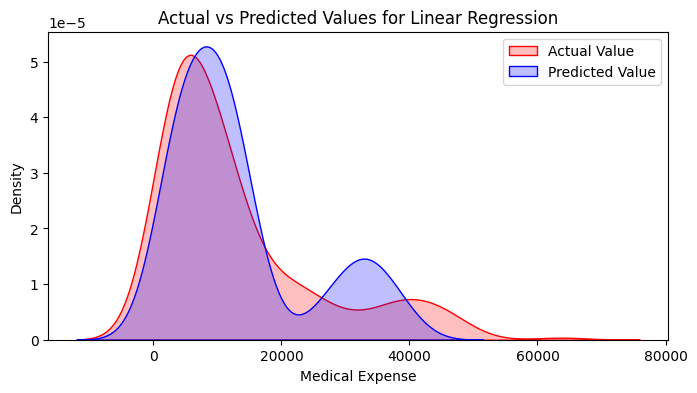

In [29]:
# Distribution of actual and predicted values for Linear Regression
plt.figure(figsize=(8, 4))
ax1 = sns.kdeplot(y_test, color='r', label='Actual Value', fill=True)
sns.kdeplot(lr_pred, color='b', label='Predicted Value', ax=ax1, fill=True)
plt.title('Actual vs Predicted Values for Linear Regression')
plt.xlabel('Medical Expense')
plt.legend()

In [30]:
print('MAE:', mean_absolute_error(y_test, lr_pred))
print('MSE:', mean_squared_error(y_test, lr_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, lr_pred)))
print('R2 Score:', r2_score(y_test, lr_pred))

MAE: 4186.508898366432
MSE: 33635210.431178406
RMSE: 5799.587091438356
R2 Score: 0.7833463107364539


### Polynomial Regression

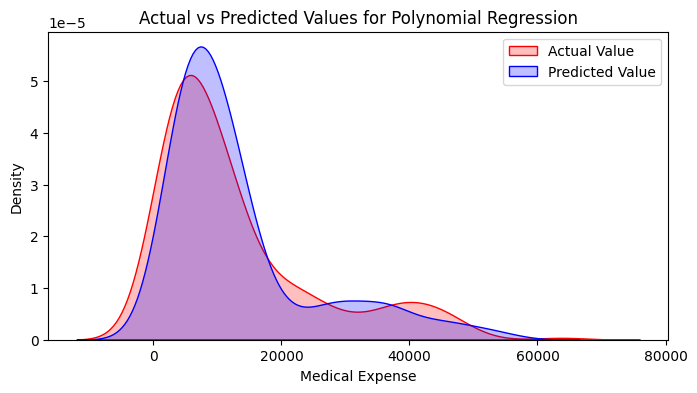

In [31]:
# Distribution of actual and predicted values for Polynomial Regression
plt.figure(figsize=(8, 4))
ax1 = sns.kdeplot(y_test, color='r', label='Actual Value', fill=True)
sns.kdeplot(poly_pred, color='b', label='Predicted Value', ax=ax1, fill=True)
plt.title('Actual vs Predicted Values for Polynomial Regression')
plt.xlabel('Medical Expense')
plt.legend()

In [32]:
print('MAE:', mean_absolute_error(y_test, poly_pred))
print('MSE:', mean_squared_error(y_test, poly_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, poly_pred)))
print('R2 Score:', r2_score(y_test, poly_pred))

MAE: 2876.0263340447764
MSE: 20970709.91582647
RMSE: 4579.378769639663
R2 Score: 0.8649218598160482


### Decision Tree Regressor

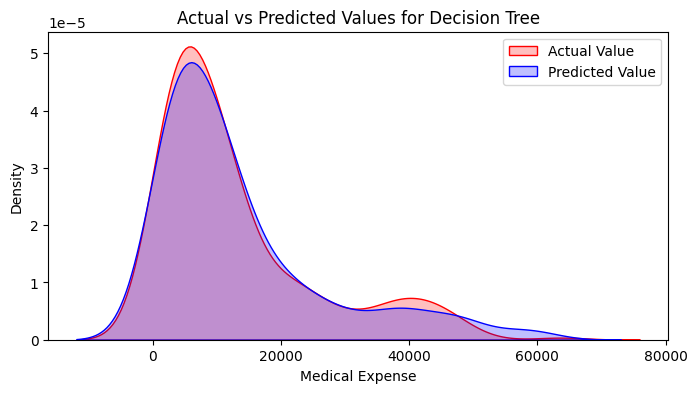

In [33]:
# Distribution of actual and predicted values for Decision Tree
plt.figure(figsize=(8, 4))
ax1 = sns.kdeplot(y_test, color='r', label='Actual Value', fill=True)
sns.kdeplot(dt_pred, color='b', label='Predicted Value', ax=ax1, fill=True)
plt.title('Actual vs Predicted Values for Decision Tree')
plt.xlabel('Medical Expense')
plt.legend()

In [34]:
print('MAE:', mean_absolute_error(y_test, dt_pred))
print('MSE:', mean_squared_error(y_test, dt_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, dt_pred)))
print('R2 Score:', r2_score(y_test, dt_pred))

MAE: 2990.503421973881
MSE: 41254518.52410566
RMSE: 6422.968046324508
R2 Score: 0.7342682408565013


### Random Forest Regressor

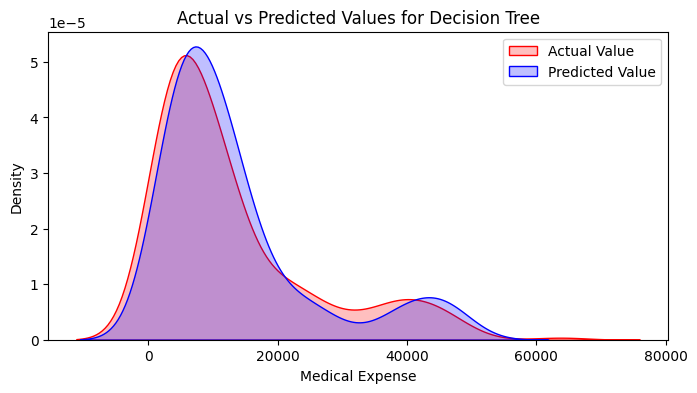

In [35]:
# Distribution of actual and predicted values for Random Forest
plt.figure(figsize=(8, 4))
ax1 = sns.kdeplot(y_test, color='r', label='Actual Value', fill=True)
sns.kdeplot(rf_pred, color='b', label='Predicted Value', ax=ax1, fill=True)
plt.title('Actual vs Predicted Values for Decision Tree')
plt.xlabel('Medical Expense')
plt.legend()

In [36]:
print('MAE:', mean_absolute_error(y_test, rf_pred))
print('MSE:', mean_squared_error(y_test, rf_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, rf_pred)))
print('R2 Score:', r2_score(y_test, rf_pred))

MAE: 2540.0145059145993
MSE: 21440052.929550245
RMSE: 4630.340476633467
R2 Score: 0.8618986917088831


# Conclusion

Dari model-model di atas, bisa kita lihat bahwa model Decision Tree dan Random Forest memberikan hasil terbaik. Namun, Random Forest lebih memberikan hasil terbaik dengan nilai RMSE paling rendah diantara model lain.

# (TAMBAHAN) Optuna

Optuna adalah framework hyperparameter untuk model machine learning yang cukup populer di Kaggle. Framework ini dapat membantu menyederhanakan dan mengotomatiskan proses hyperparameter tuning.

Pertama, kita akan membuat fungsi **objective** yang berisi parameter yang akan dites.

In [37]:
import optuna
from sklearn.model_selection import cross_val_score

In [38]:
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 100, 1000)
    max_depth = trial.suggest_int('max_depth', 10, 15)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 32)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 32)

    model = RandomForestRegressor(n_estimators=n_estimators,
                                  max_depth=max_depth,
                                  min_samples_split=min_samples_split,
                                  min_samples_leaf=min_samples_leaf)
    
    score = cross_val_score(model, X, y, n_jobs=-1, cv=5, scoring='neg_mean_squared_error').mean()

    return score

In [39]:
study = optuna.create_study(direction='maximize',
                            sampler=optuna.samplers.RandomSampler(seed=42))

[I 2024-08-22 15:19:45,334] A new study created in memory with name: no-name-40bc3292-15a8-4d19-8f61-d3103dac3c05


Selanjutnya kita akan mengirim parameter yang ada di objective untuk dioptimisasikan dengan trials.

In [40]:
study.optimize(objective, n_trials=100)

[I 2024-08-22 15:20:10,092] Trial 0 finished with value: -20503726.104460627 and parameters: {'n_estimators': 437, 'max_depth': 15, 'min_samples_split': 24, 'min_samples_leaf': 20}. Best is trial 0 with value: -20503726.104460627.
[I 2024-08-22 15:20:13,558] Trial 1 finished with value: -20779071.65384064 and parameters: {'n_estimators': 240, 'max_depth': 10, 'min_samples_split': 3, 'min_samples_leaf': 28}. Best is trial 0 with value: -20503726.104460627.
[I 2024-08-22 15:20:16,318] Trial 2 finished with value: -20900961.99084604 and parameters: {'n_estimators': 641, 'max_depth': 14, 'min_samples_split': 2, 'min_samples_leaf': 32}. Best is trial 0 with value: -20503726.104460627.
[I 2024-08-22 15:20:18,292] Trial 3 finished with value: -20654287.00719027 and parameters: {'n_estimators': 850, 'max_depth': 11, 'min_samples_split': 7, 'min_samples_leaf': 6}. Best is trial 0 with value: -20503726.104460627.
[I 2024-08-22 15:20:19,122] Trial 4 finished with value: -20305591.862705387 and pa

In [41]:
best_params = study.best_params
best_score = study.best_value

print(f"Best Hyperparameters: {best_params}")
print(f"Best Accuracy: {best_score:.3f}")

Best Hyperparameters: {'n_estimators': 179, 'max_depth': 11, 'min_samples_split': 3, 'min_samples_leaf': 11}
Best Accuracy: -20252464.833


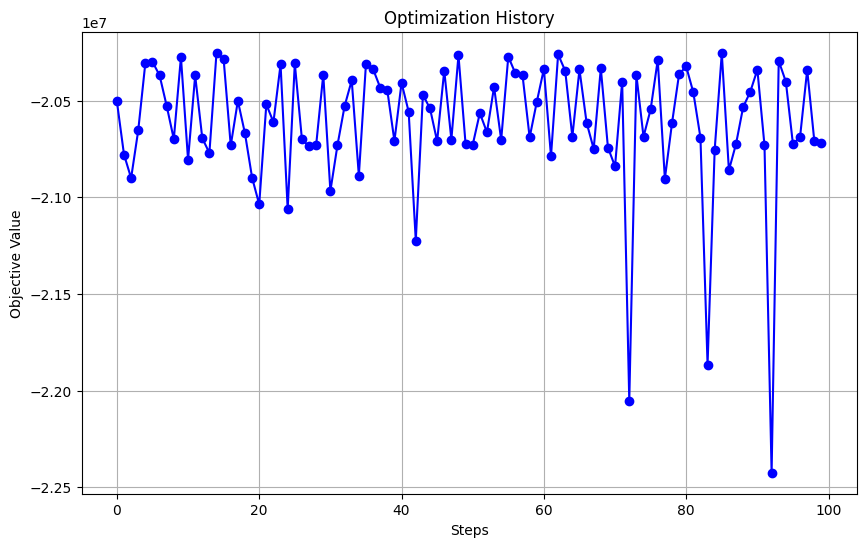

In [42]:
# Extract trials data
trials = study.trials
values = [trial.value for trial in trials if trial.value is not None]
steps = list(range(len(values)))

# Plot optuna result
plt.figure(figsize=(10, 6))
plt.plot(steps, values, marker='o', linestyle='-', color='b')
plt.xlabel('Steps')
plt.ylabel('Objective Value')
plt.title('Optimization History')
plt.grid(True)
plt.show()

In [43]:
best_n_estimators = best_params['n_estimators']
best_max_depth = best_params['max_depth']
best_min_samples_split = best_params['min_samples_split']
best_min_samples_leaf = best_params['min_samples_leaf']

Setelah mendapatkan parameter terbaik, kita akan membuat kembali model Random Forest dengan parameter baru.

In [44]:
best_model = RandomForestRegressor(n_estimators=best_n_estimators,
                                   max_depth=best_max_depth,
                                   min_samples_split=best_min_samples_split,
                                   min_samples_leaf=best_min_samples_leaf)
best_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=11, min_samples_leaf=11, min_samples_split=3,
                      n_estimators=179)

In [45]:
op_pred = best_model.predict(X_test)

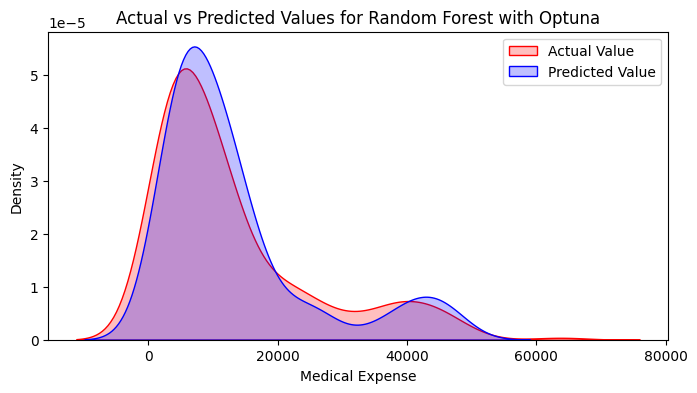

In [46]:
# Distribution of actual and predicted values for Random Forest with Optuna
plt.figure(figsize=(8, 4))
ax1 = sns.kdeplot(y_test, color='r', label='Actual Value', fill=True)
sns.kdeplot(op_pred, color='b', label='Predicted Value', ax=ax1, fill=True)
plt.title('Actual vs Predicted Values for Random Forest with Optuna')
plt.xlabel('Medical Expense')
plt.legend()

In [47]:
print('MAE:', mean_absolute_error(y_test, op_pred))
print('MSE:', mean_squared_error(y_test, op_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, op_pred)))
print('R2 Score:', r2_score(y_test, op_pred))

MAE: 2448.8505783887163
MSE: 18808214.23117167
RMSE: 4336.843809865842
R2 Score: 0.8788510923699991


Model Random Forest dengan Optuna menghasilkan model dengan kinerja terbaik karena secara konsisten memiliki MAE, MSE, dan RMSE terendah, serta skor R² tertinggi. Hal ini menunjukkan bahwa model ini memberikan prediksi yang paling akurat dan andal untuk prediksi *medical cost*.